In [114]:
import os
import re

import pandas

In [115]:
entropy = pandas.read_json('data/output/entropy/sample_0.jsonl', lines=True)
entropy.head(1)

,question_id,entropy_solution,entropy_equation_strict,entropy_equation_loose
0,40964,0.468996,2.921928,0.0


In [116]:
joined = pandas.read_json('data/output/joined/sample_0.jsonl', lines=True)
joined['is_correct'] = joined['A. ChatGPT gets it correct from text to final solution']
joined['is_wrong'] = 1 - joined['is_correct']
joined = joined[['question_id', 'is_wrong']]
joined.head(1)

,question_id,is_wrong
0,337,0


In [117]:
combined = joined.set_index('question_id').join(entropy.set_index('question_id'))
combined

,is_wrong,entropy_solution,entropy_equation_strict,entropy_equation_loose
question_id,,,,
337,0,0.000000,3.121928,1.960964
1042,0,0.000000,2.321928,0.000000
1299,0,0.000000,2.921928,1.295462
1422,0,0.000000,2.921928,1.356780
1431,0,1.356780,3.121928,0.721928
...,...,...,...,...
943749,1,3.321928,3.321928,2.160964
948538,0,0.000000,1.770951,0.721928
948913,0,0.000000,2.321928,1.360964


In [118]:
def generate_geq(row, column, step_size):
    for i in range(0, 50, step_size):
        i = round(i * 0.1, 1)
        if row[column] > i: row[f'{column}_geq_{i}'] = True
        else: row[f'{column}_geq_{i}'] = False
    return row

In [127]:
def do_geq(column, combined):
    combined = combined.apply(lambda row : generate_geq(row, column=f'{column}', step_size=1), axis=1)
    combined.head(1)
    to_graph = []
    for i in range(0, 50, 1):
        i = round(i * 0.1, 1)
        one = combined[combined[f'{column}_geq_{i}']]
        if len(one) == 0: break
        to_graph.append({
            'geq_value': i, 
            'num_correct': one['is_wrong'].sum(), 
            'set size': len(one), 
            'probability_of_failure': one['is_wrong'].sum() / len(one)
        })
    to_graph = pandas.DataFrame(to_graph)
    import matplotlib.pyplot as plt

    x_axis = to_graph['geq_value']
    y_axis = to_graph['probability_of_failure']

    plt.plot(x_axis, y_axis)
    plt.title(f'probability vs entropy ({column})')
    plt.xlabel('entropy (geq)')
    plt.ylabel('probability of failure')
    plt.show()

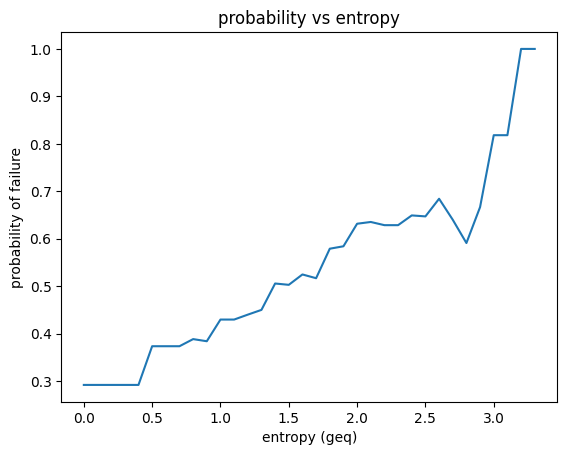

In [128]:
do_geq('entropy_solution', combined)

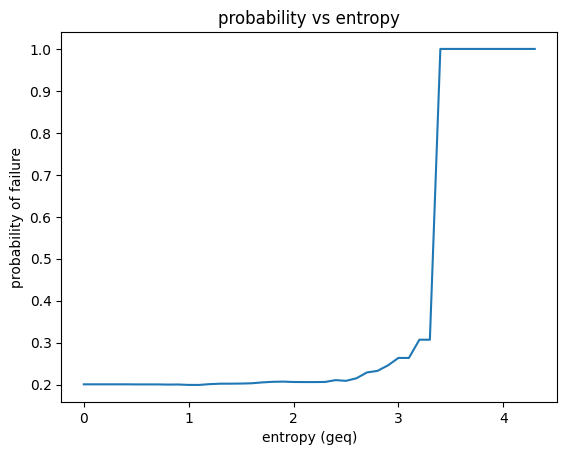

In [129]:
do_geq('entropy_equation_strict', combined)

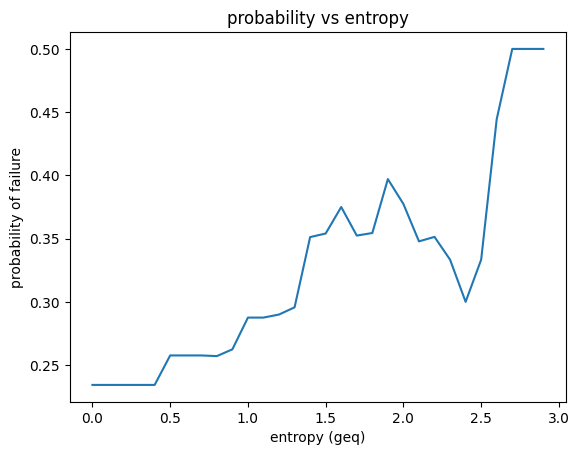

In [130]:
do_geq('entropy_equation_loose', combined)